<a href="https://colab.research.google.com/github/multitude00999/hf_audio_course/blob/main/notebooks/unit2/hands_on_excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install datasets[audio]
! pip install transformers

In [44]:
! pip install kenlm

  Using cached kenlm-0.1.tar.gz (424 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for kenlm: filename=kenlm-0.1-cp310-cp310-linux_x86_64.whl size=3003831 sha256=168f5d50323e8846cb77c3361c667df6f4276144ebda0ae8e07f500aaaccaa7e
  Stored in directory: /root/.cache/pip/wheels/4e/3a/01/9105a071c30781823efbd96a58279c16f948a87cafb1144042
Successfully built kenlm


In [45]:
! pip install pyctcdecode

  Using cached pyctcdecode-0.5.0-py2.py3-none-any.whl (39 kB)
  Using cached pygtrie-2.5.0-py3-none-any.whl (25 kB)
  Using cached hypothesis-6.80.0-py3-none-any.whl (414 kB)


In [1]:
from datasets import load_dataset
from IPython.display import Audio
import librosa
from matplotlib import pyplot as plt
from transformers import WhisperFeatureExtractor, pipeline
import numpy as np

In [2]:
voxpopuli_italian = load_dataset("facebook/voxpopuli", "it", streaming = True)

In [3]:
next(iter(voxpopuli_italian['train']))

{'audio_id': '20130522-0900-PLENARY-15-it_20130522-17:29:48_2',
 'language': 5,
 'audio': {'path': 'train_part_0/20130522-0900-PLENARY-15-it_20130522-17:29:48_2.wav',
  'array': array([0.04092407, 0.03231812, 0.037323  , ..., 0.00527954, 0.00784302,
         0.00302124]),
  'sampling_rate': 16000},
 'raw_text': "Ma quanto sarebbe utile che, recuperando i patrimoni sottratti da dittatori e da nomenclature, si creino dei fondi di sviluppo economico diffuso, del microcredito, delle agevolazioni per l'imprenditoria, delle borse di studio per gli studenti, e sarebbe il modo migliore per restituire ai cittadini quanto gli è stato sottratto e si darebbe un segnale potente di che cosa può offrire una collaborazione internazionale virtuosa.",
 'normalized_text': "ma quanto sarebbe utile che recuperando i patrimoni sottratti da dittatori e da nomenclature si creino dei fondi di sviluppo economico diffuso del microcredito delle agevolazioni per l'imprenditoria delle borse di studio per gli studen

In [4]:
voxpopuli_italian_head = voxpopuli_italian["train"].take(3)
list(voxpopuli_italian_head)

[{'audio_id': '20130522-0900-PLENARY-15-it_20130522-17:29:48_2',
  'language': 5,
  'audio': {'path': 'train_part_0/20130522-0900-PLENARY-15-it_20130522-17:29:48_2.wav',
   'array': array([0.04092407, 0.03231812, 0.037323  , ..., 0.00527954, 0.00784302,
          0.00302124]),
   'sampling_rate': 16000},
  'raw_text': "Ma quanto sarebbe utile che, recuperando i patrimoni sottratti da dittatori e da nomenclature, si creino dei fondi di sviluppo economico diffuso, del microcredito, delle agevolazioni per l'imprenditoria, delle borse di studio per gli studenti, e sarebbe il modo migliore per restituire ai cittadini quanto gli è stato sottratto e si darebbe un segnale potente di che cosa può offrire una collaborazione internazionale virtuosa.",
  'normalized_text': "ma quanto sarebbe utile che recuperando i patrimoni sottratti da dittatori e da nomenclature si creino dei fondi di sviluppo economico diffuso del microcredito delle agevolazioni per l'imprenditoria delle borse di studio per gl

In [5]:
voxpopuli_italian_head_3 = list(voxpopuli_italian_head)[2]

## EDA

In [6]:
# play audio
Audio(data = voxpopuli_italian_head_3['audio']['array'], rate = voxpopuli_italian_head_3['audio']['sampling_rate'])

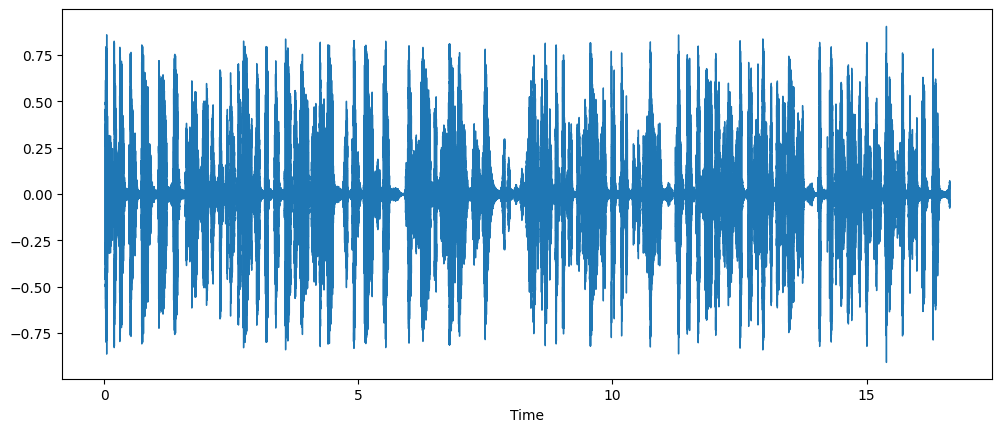

In [7]:
# plot waveform
array = voxpopuli_italian_head_3["audio"]["array"]
sampling_rate = voxpopuli_italian_head_3["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

In [8]:
feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")

In [9]:
def prepare_dataset(example):
    audio = example["audio"]
    features = feature_extractor(
        audio["array"], sampling_rate=audio["sampling_rate"], padding=True
    )
    return features

In [10]:
voxpopuli_italian_head_3_features = prepare_dataset(voxpopuli_italian_head_3)
voxpopuli_italian_head_3_features

{'input_features': [array([[ 4.3392265e-01,  4.0317416e-02, -3.2790005e-01, ...,
        -3.9569104e-01, -3.1489599e-01, -3.7386918e-01],
       [ 3.7841082e-01, -1.2508166e-01, -1.1730707e-01, ...,
        -3.2739389e-01, -3.7595725e-01, -2.2822666e-01],
       [ 3.5771155e-01, -2.3355484e-02,  3.1568295e-01, ...,
        -1.6153145e-01, -2.7467752e-01, -2.1550679e-01],
       ...,
       [ 2.5604242e-01,  2.9396343e-01,  2.4832761e-01, ...,
         1.1470699e-01,  1.0784572e-01,  1.0582787e-01],
       [ 1.4473659e-01,  1.4100254e-01,  2.6435828e-01, ...,
         1.0760212e-01,  1.2949318e-01,  9.5505595e-02],
       [ 1.1356127e-01,  3.1125486e-02,  1.3899541e-01, ...,
        -7.0515990e-02, -6.2529922e-02, -5.5670738e-05]], dtype=float32)]}

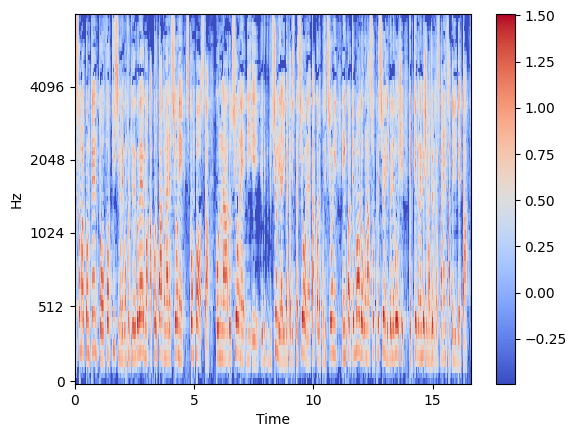

In [11]:
# mel spectrogram
librosa.display.specshow(
    np.asarray(voxpopuli_italian_head_3_features['input_features'][0]),
    x_axis="time",
    y_axis="mel",
    sr=feature_extractor.sampling_rate,
    hop_length=feature_extractor.hop_length,
)
plt.colorbar()

## ASR on this example

In [13]:
asr_italian = pipeline("automatic-speech-recognition", model = "dbdmg/wav2vec2-xls-r-300m-italian-robust")


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
asr_italian(voxpopuli_italian_head_3['audio']['array'])

{'text': 'questo malcontento fortissimo nei confronti del governo ha portato una reazione scomposta con una adozione di riduzione della libertà di espressione attacco alla posizioni e in qualche modo una soppressione di quelle voci che chiedono invece maggiore trasparenza e libertà'}

In [15]:
# ground truth
voxpopuli_italian_head_3['raw_text']

"Tale malcontento fortissimo nei confronti del governo ha portato a una reazione scomposta, con una riduzione della libertà di espressione, l'attacco alle opposizioni e, in qualche modo, una soppressione di quelle voci che chiedono invece maggiore trasparenza e libertà."

# Bonus: gender classification

In [12]:
gender_classifier = pipeline(model="alefiury/wav2vec2-large-xlsr-53-gender-recognition-librispeech")

In [13]:
gender_classifier(voxpopuli_italian_head_3['audio']['array'])

[{'score': 0.9985405206680298, 'label': 'male'},
 {'score': 0.0014594515087082982, 'label': 'female'}]